In [238]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
from matplotlib.colors import Normalize
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn import svm, metrics
from sklearn.metrics import accuracy_score

In [239]:
x, y = make_classification(n_samples = 100, n_features = 8, n_classes = 2)

In [240]:
# adding the data into a python data frame
df = pd.DataFrame(x, y)
df

,0,1,2,3,4,5,6,7
0,-0.329084,-0.050812,-0.310351,-0.250792,0.477676,0.481924,-0.286603,-1.802863
0,-1.758018,-0.360346,-1.835811,0.367831,1.650861,-0.963969,0.073881,0.286493
0,-1.345755,-0.168465,-1.392528,2.007382,1.328451,-1.245202,1.750713,-0.493167
0,-0.915909,-0.093682,-0.936103,-0.274222,0.963088,-1.431632,-0.738641,-0.984629
1,1.028818,0.747605,1.052720,-0.402024,-1.075636,0.485955,0.777497,1.038013
...,...,...,...,...,...,...,...,...
0,-0.996993,-0.677049,-1.063133,0.900240,0.824668,-0.091609,-1.661181,1.390450
0,-0.740828,-1.769966,-0.750152,-0.637350,0.814494,1.051242,-1.492613,-1.187247
0,-0.992091,0.557914,-1.017767,1.277616,1.023936,-0.375970,-0.282009,-0.854528
1,1.279562,0.290705,1.311043,-0.266542,-1.328913,-1.741127,-0.771246,1.193274


In [241]:
#                                       find the best parameters for our SVM classifier
C_range = [1, 0.5, 0.1, 100, 1000]
gamma_range = [1, 0.5, 0.35, 0.1, 0.003, 0.0009]

parameters = {
   'C': [1, 0.5, 0.1, 100, 1000],
   'gamma': [1, 0.5, 0.35, 0.1, 0.003, 0.0009]}


cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=parameters, cv=cv)
grid.fit(x, y)

print("%s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

{'C': 1, 'gamma': 0.003} with a score of 0.91


Test Accuracy: 1.0
Test Accuracy: 0.15789473684210525
Test Accuracy: 0.8421052631578947
Test Accuracy: 0.3157894736842105
Test Accuracy: 0.6842105263157895
Test Accuracy: 0.2631578947368421


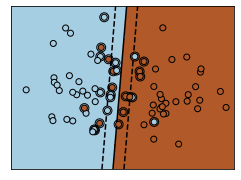

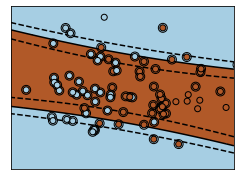

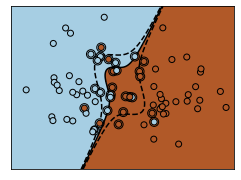

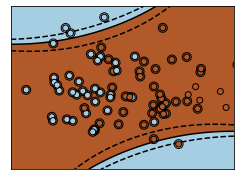

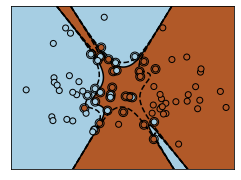

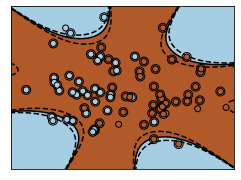

In [249]:
# Our dataset and targets
X = x[0:80,[2,3]]
Y = y[0:80]


# Test Data will be 20% of our data
X_test = x[81:100,[2,3]]
y_test = y[81:100]

# figure number
fignum = 1

polynomial_degree_range = [1,2,3,4,5,6]
# fit the model
for kernel in polynomial_degree_range:
    clf = svm.SVC(kernel="poly", gamma=2,degree = kernel )
    clf.fit(X, Y)
    
    # Predict using model
    y_pred = clf.predict(X_test)
    print("Test Accuracy:", metrics.accuracy_score(y_test.ravel(), y_pred))

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()

    #              *************** NOT MY CODE ***************** 
    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k",
    )
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired, edgecolors="k")

    plt.axis("tight")
    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(
        XX,
        YY,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1
